**Boxplot and Statistics for Geological Attributes**

Heber Hernández G. (https://github.com/heberallin)

Este cuaderno genera como salida un gráfico de múltiples diagramas de cajas y bigotes, en función a la categoría de atributos geológicos sobre una ley mineral. Tiene un máximo de 20 categorías para hasta 5 atributos geológicos. 

* Los atributos geológicos se leen como valores númericos y NO cadenas de texto. Por ejemplo: 
    * Atributo = Mineralización, Categoría = Óxido, **Código = 1**
    * Atributo = Mineralización, Categoría = Sulfuro, **Código = 2**
    * Atributo = Mineralización, Categoría = xxxx, **Código = n**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.style.use('seaborn-bright')
ruta = "C:/Users/nubem/Desktop/boxplot_trabajo/" #Dirección en donde se encuentra el archivo a estudiar
df = pd.read_csv(ruta + "data_project.csv", sep=";") #Nombre del archivo 
df.head()

,X,Y,Z,Alteration,Au (gr/ton),Ag (gr/ton),Mineralization_d,Mineralization
0,41371.25071,802992.1231,442.034815,2,0.054433,1.322476,Oxido,1
1,41370.74381,802992.2612,441.509428,2,0.047919,0.430417,Oxido,1
2,41370.23648,802992.3977,440.984041,2,0.085141,1.433917,Oxido,1
3,41369.72872,802992.5325,440.458654,2,0.045257,1.749394,Sulfuro,3
4,41369.22052,802992.6658,439.933265,2,0.010000,0.200000,Sulfuro,3


In [5]:
variable_geo = input("Ingrese el atributo geológico No. 1 que desea estudiar:" )
variable_geo2 = input("Ingrese el atributo geológico No. 2 que desea estudiar:" )
variable_geo3 = input("Ingrese el atributo geológico No. 3 que desea estudiar:" )
variable_geo4 = input("Ingrese el atributo geológico No. 4 que desea estudiar:" )
variable_geo5 = input("Ingrese el atributo geológico No. 5 que desea estudiar:" )
variable_1 = input("Ingrese la ley mineral que desea estudiar:" )
nn = int(input("Ingrese el número de decimales en las estadísticas: "))

Ingrese el atributo geológico No. 1 que desea estudiar:Alteration
Ingrese el atributo geológico No. 2 que desea estudiar:Mineralization
Ingrese el atributo geológico No. 3 que desea estudiar:Alteration
Ingrese el atributo geológico No. 4 que desea estudiar:Alteration
Ingrese el atributo geológico No. 5 que desea estudiar:Mineralization
Ingrese la ley mineral que desea estudiar:Au (gr/ton)
Ingrese el número de decimales en las estadísticas: 3


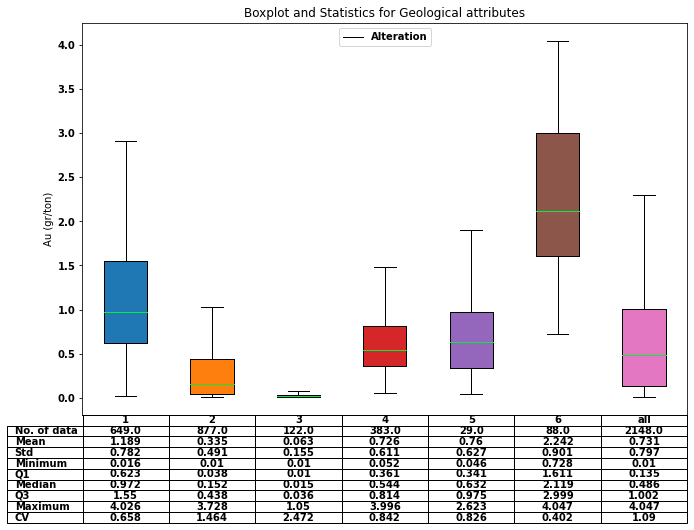

In [12]:
iteration = {} #Creación de los DF que corresponden a cada atributo geológico (máximo 15 categorias por atributo)
for i in range (1,20+1):
    iteration["df_{}".format(i)] = pd.DataFrame(df[(df[variable_geo] == i)])
data = [iteration["df_1"][variable_1], iteration["df_2"][variable_1], iteration["df_3"][variable_1],
       iteration["df_4"][variable_1],iteration["df_5"][variable_1],iteration["df_6"][variable_1],
       iteration["df_7"][variable_1],iteration["df_8"][variable_1],iteration["df_9"][variable_1],
       iteration["df_10"][variable_1],iteration["df_11"][variable_1],iteration["df_12"][variable_1],
        iteration["df_13"][variable_1],iteration["df_14"][variable_1],iteration["df_15"][variable_1],
       iteration["df_16"][variable_1],iteration["df_17"][variable_1],iteration["df_18"][variable_1], 
        iteration["df_19"][variable_1],iteration["df_20"][variable_1],df[variable_1]]
stats_var_geo = df.groupby([variable_geo]).describe()
CV = (stats_var_geo[variable_1]["std"]/stats_var_geo[variable_1]["mean"]) #coeficiente de variación
CV = CV.tolist()
data_text = np.array(stats_var_geo[variable_1].T)
data_text = np.vstack([data_text, CV])

variables = [variable_1] 
df_stats_global = df[variables]

CV_all = (df_stats_global.std()/df_stats_global.mean()) #coeficiente de variación

total =  pd.concat([df_stats_global.describe().T,
                      CV_all.rename('CV'),
                     ], axis=1).T
data_text = pd.DataFrame(data_text)
data_text["All"] = total[variable_1].values
data_text = np.array(data_text)
data_text = np.round(data_text,nn) #valores despues de la coma en las estadísticas
data_text1 = data_text.tolist()
columns = [str(x) for x in np.arange(1,len(df[variable_geo].unique())+1,1)]
columns.append("all")

rows = ["No. of data", "Mean", "Std", "Minimum", "Q1", "Median", "Q3", "Maximum", "CV"]
n_rows = len(data)
y_offset = np.zeros(len(columns))
index = np.arange(len(columns)) + 0.3
fig, ax = plt.subplots(figsize=(12,8))
font = {'weight' : 'bold',
        'size'   : 10} #modificar tamaño de letra
matplotlib.rc('font', **font)
diamantes = dict(markerfacecolor='r', marker='o')
cell_text = []
h = np.arange(0,len(df[variable_geo].unique())).tolist()
h.append(-1)
for row in range(n_rows):
    box = plt.boxplot([data[i] for i in h ], patch_artist=True, flierprops=diamantes, showfliers=False)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', "tab:pink"]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlim(0.5,len(df[variable_geo].unique())+1.5)
cell_text.reverse()
the_table = plt.table(cellText=data_text1,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom', cellLoc='center')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.legend([variable_geo], loc='upper center') #En caso de cambiar la leyenda del gráfico (arriba central)
plt.ylabel(variable_1) #Modificar etiqueta del eje Y
plt.xticks([]) #En caso de querer cambiar las etiquetas del código del atributo geológico 
plt.title('Boxplot and Statistics for Geological attributes')
plt.savefig(ruta + "boxplot1" +".png", dpi=300) 
plt.show()

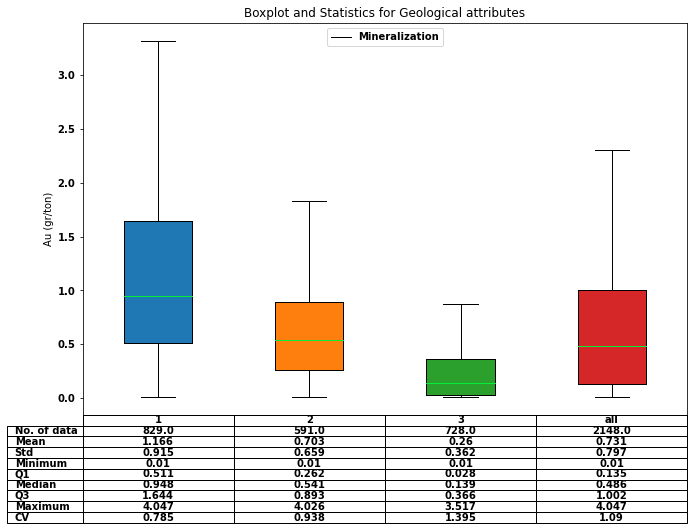

In [13]:
iteration = {} #Creación de los DF que corresponden a cada atributo geológico (máximo 15 categorias por atributo)
for i in range (1,20+1):
    iteration["df_{}".format(i)] = pd.DataFrame(df[(df[variable_geo2] == i)])
data = [iteration["df_1"][variable_1], iteration["df_2"][variable_1], iteration["df_3"][variable_1],
       iteration["df_4"][variable_1],iteration["df_5"][variable_1],iteration["df_6"][variable_1],
       iteration["df_7"][variable_1],iteration["df_8"][variable_1],iteration["df_9"][variable_1],
       iteration["df_10"][variable_1],iteration["df_11"][variable_1],iteration["df_12"][variable_1],
        iteration["df_13"][variable_1],iteration["df_14"][variable_1],iteration["df_15"][variable_1],
       iteration["df_16"][variable_1],iteration["df_17"][variable_1],iteration["df_18"][variable_1], 
        iteration["df_19"][variable_1],iteration["df_20"][variable_1],df[variable_1]]
stats_var_geo = df.groupby([variable_geo2]).describe()
CV = (stats_var_geo[variable_1]["std"]/stats_var_geo[variable_1]["mean"]) #coeficiente de variación
CV = CV.tolist()
data_text = np.array(stats_var_geo[variable_1].T)
data_text = np.vstack([data_text, CV])

variables = [variable_1] 
df_stats_global = df[variables]

CV_all = (df_stats_global.std()/df_stats_global.mean()) #coeficiente de variación

total =  pd.concat([df_stats_global.describe().T,
                      CV_all.rename('CV'),
                     ], axis=1).T
data_text = pd.DataFrame(data_text)
data_text["All"] = total[variable_1].values
data_text = np.array(data_text)
data_text = np.round(data_text,nn) #valores despues de la coma en las estadísticas
data_text1 = data_text.tolist()
columns = [str(x) for x in np.arange(1,len(df[variable_geo2].unique())+1,1)]
columns.append("all")

rows = ["No. of data", "Mean", "Std", "Minimum", "Q1", "Median", "Q3", "Maximum", "CV"]
n_rows = len(data)
y_offset = np.zeros(len(columns))
index = np.arange(len(columns)) + 0.3
fig, ax = plt.subplots(figsize=(12,8))
font = {'weight' : 'bold',
        'size'   : 10} #modificar tamaño de letra
matplotlib.rc('font', **font)
diamantes = dict(markerfacecolor='r', marker='o')
cell_text = []
h = np.arange(0,len(df[variable_geo2].unique())).tolist()
h.append(-1)
for row in range(n_rows):
    box = plt.boxplot([data[i] for i in h ], patch_artist=True, flierprops=diamantes, showfliers=False)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', "tab:pink"]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlim(0.5,len(df[variable_geo2].unique())+1.5)
cell_text.reverse()
the_table = plt.table(cellText=data_text1,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom', cellLoc='center')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.legend([variable_geo2], loc='upper center') #En caso de cambiar la leyenda del gráfico (arriba central)
plt.ylabel(variable_1) #Modificar etiqueta del eje Y
plt.xticks([]) #En caso de querer cambiar las etiquetas del código del atributo geológico 
plt.title('Boxplot and Statistics for Geological attributes')
plt.savefig(ruta + "boxplot2" +".png", dpi=300) 
plt.show()

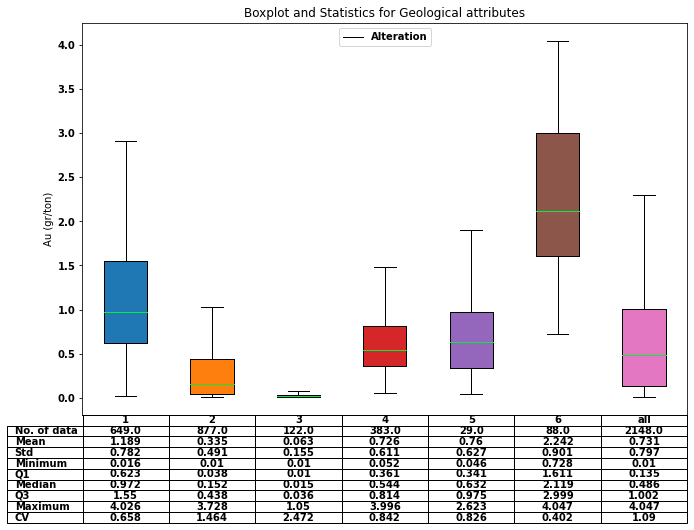

In [14]:
iteration = {} #Creación de los DF que corresponden a cada atributo geológico (máximo 15 categorias por atributo)
for i in range (1,20+1):
    iteration["df_{}".format(i)] = pd.DataFrame(df[(df[variable_geo3] == i)])
data = [iteration["df_1"][variable_1], iteration["df_2"][variable_1], iteration["df_3"][variable_1],
       iteration["df_4"][variable_1],iteration["df_5"][variable_1],iteration["df_6"][variable_1],
       iteration["df_7"][variable_1],iteration["df_8"][variable_1],iteration["df_9"][variable_1],
       iteration["df_10"][variable_1],iteration["df_11"][variable_1],iteration["df_12"][variable_1],
        iteration["df_13"][variable_1],iteration["df_14"][variable_1],iteration["df_15"][variable_1],
       iteration["df_16"][variable_1],iteration["df_17"][variable_1],iteration["df_18"][variable_1], 
        iteration["df_19"][variable_1],iteration["df_20"][variable_1],df[variable_1]]
stats_var_geo = df.groupby([variable_geo3]).describe()
CV = (stats_var_geo[variable_1]["std"]/stats_var_geo[variable_1]["mean"]) #coeficiente de variación
CV = CV.tolist()
data_text = np.array(stats_var_geo[variable_1].T)
data_text = np.vstack([data_text, CV])

variables = [variable_1] 
df_stats_global = df[variables]

CV_all = (df_stats_global.std()/df_stats_global.mean()) #coeficiente de variación

total =  pd.concat([df_stats_global.describe().T,
                      CV_all.rename('CV'),
                     ], axis=1).T
data_text = pd.DataFrame(data_text)
data_text["All"] = total[variable_1].values
data_text = np.array(data_text)
data_text = np.round(data_text,nn) #valores despues de la coma en las estadísticas
data_text1 = data_text.tolist()
columns = [str(x) for x in np.arange(1,len(df[variable_geo3].unique())+1,1)]
columns.append("all")

rows = ["No. of data", "Mean", "Std", "Minimum", "Q1", "Median", "Q3", "Maximum", "CV"]
n_rows = len(data)
y_offset = np.zeros(len(columns))
index = np.arange(len(columns)) + 0.3
fig, ax = plt.subplots(figsize=(12,8))
font = {'weight' : 'bold',
        'size'   : 10} #modificar tamaño de letra
matplotlib.rc('font', **font)
diamantes = dict(markerfacecolor='r', marker='o')
cell_text = []
h = np.arange(0,len(df[variable_geo3].unique())).tolist()
h.append(-1)
for row in range(n_rows):
    box = plt.boxplot([data[i] for i in h ], patch_artist=True, flierprops=diamantes, showfliers=False)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', "tab:pink"]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlim(0.5,len(df[variable_geo3].unique())+1.5)
cell_text.reverse()
the_table = plt.table(cellText=data_text1,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom', cellLoc='center')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.legend([variable_geo3], loc='upper center') #En caso de cambiar la leyenda del gráfico (arriba central)
plt.ylabel(variable_1) #Modificar etiqueta del eje Y
plt.xticks([]) #En caso de querer cambiar las etiquetas del código del atributo geológico 
plt.title('Boxplot and Statistics for Geological attributes')
plt.savefig(ruta + "boxplot3" +".png", dpi=300) 
plt.show()

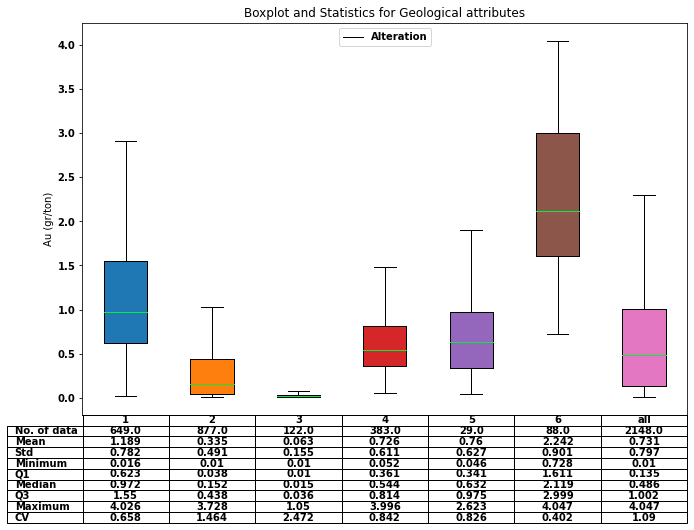

In [15]:
iteration = {} #Creación de los DF que corresponden a cada atributo geológico (máximo 15 categorias por atributo)
for i in range (1,20+1):
    iteration["df_{}".format(i)] = pd.DataFrame(df[(df[variable_geo4] == i)])
data = [iteration["df_1"][variable_1], iteration["df_2"][variable_1], iteration["df_3"][variable_1],
       iteration["df_4"][variable_1],iteration["df_5"][variable_1],iteration["df_6"][variable_1],
       iteration["df_7"][variable_1],iteration["df_8"][variable_1],iteration["df_9"][variable_1],
       iteration["df_10"][variable_1],iteration["df_11"][variable_1],iteration["df_12"][variable_1],
        iteration["df_13"][variable_1],iteration["df_14"][variable_1],iteration["df_15"][variable_1],
       iteration["df_16"][variable_1],iteration["df_17"][variable_1],iteration["df_18"][variable_1], 
        iteration["df_19"][variable_1],iteration["df_20"][variable_1],df[variable_1]]
stats_var_geo = df.groupby([variable_geo4]).describe()
CV = (stats_var_geo[variable_1]["std"]/stats_var_geo[variable_1]["mean"]) #coeficiente de variación
CV = CV.tolist()
data_text = np.array(stats_var_geo[variable_1].T)
data_text = np.vstack([data_text, CV])

variables = [variable_1] 
df_stats_global = df[variables]

CV_all = (df_stats_global.std()/df_stats_global.mean()) #coeficiente de variación

total =  pd.concat([df_stats_global.describe().T,
                      CV_all.rename('CV'),
                     ], axis=1).T
data_text = pd.DataFrame(data_text)
data_text["All"] = total[variable_1].values
data_text = np.array(data_text)
data_text = np.round(data_text,nn) #valores despues de la coma en las estadísticas
data_text1 = data_text.tolist()
columns = [str(x) for x in np.arange(1,len(df[variable_geo4].unique())+1,1)]
columns.append("all")

rows = ["No. of data", "Mean", "Std", "Minimum", "Q1", "Median", "Q3", "Maximum", "CV"]
n_rows = len(data)
y_offset = np.zeros(len(columns))
index = np.arange(len(columns)) + 0.3
fig, ax = plt.subplots(figsize=(12,8))
font = {'weight' : 'bold',
        'size'   : 10} #modificar tamaño de letra
matplotlib.rc('font', **font)
diamantes = dict(markerfacecolor='r', marker='o')
cell_text = []
h = np.arange(0,len(df[variable_geo4].unique())).tolist()
h.append(-1)
for row in range(n_rows):
    box = plt.boxplot([data[i] for i in h ], patch_artist=True, flierprops=diamantes, showfliers=False)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', "tab:pink"]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlim(0.5,len(df[variable_geo4].unique())+1.5)
cell_text.reverse()
the_table = plt.table(cellText=data_text1,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom', cellLoc='center')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.legend([variable_geo4], loc='upper center') #En caso de cambiar la leyenda del gráfico (arriba central)
plt.ylabel(variable_1) #Modificar etiqueta del eje Y
plt.xticks([]) #En caso de querer cambiar las etiquetas del código del atributo geológico 
plt.title('Boxplot and Statistics for Geological attributes')
plt.savefig(ruta + "boxplot4" +".png", dpi=300) 
plt.show()

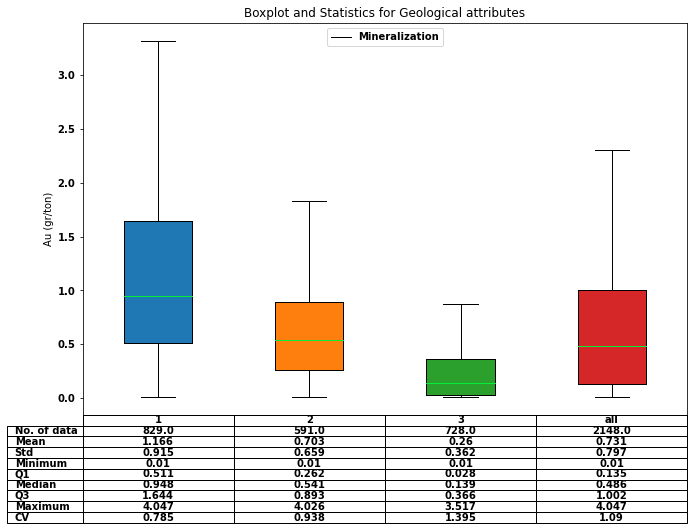

In [16]:
iteration = {} #Creación de los DF que corresponden a cada atributo geológico (máximo 15 categorias por atributo)
for i in range (1,20+1):
    iteration["df_{}".format(i)] = pd.DataFrame(df[(df[variable_geo5] == i)])
data = [iteration["df_1"][variable_1], iteration["df_2"][variable_1], iteration["df_3"][variable_1],
       iteration["df_4"][variable_1],iteration["df_5"][variable_1],iteration["df_6"][variable_1],
       iteration["df_7"][variable_1],iteration["df_8"][variable_1],iteration["df_9"][variable_1],
       iteration["df_10"][variable_1],iteration["df_11"][variable_1],iteration["df_12"][variable_1],
        iteration["df_13"][variable_1],iteration["df_14"][variable_1],iteration["df_15"][variable_1],
       iteration["df_16"][variable_1],iteration["df_17"][variable_1],iteration["df_18"][variable_1], 
        iteration["df_19"][variable_1],iteration["df_20"][variable_1],df[variable_1]]
stats_var_geo = df.groupby([variable_geo5]).describe()
CV = (stats_var_geo[variable_1]["std"]/stats_var_geo[variable_1]["mean"]) #coeficiente de variación
CV = CV.tolist()
data_text = np.array(stats_var_geo[variable_1].T)
data_text = np.vstack([data_text, CV])

variables = [variable_1] 
df_stats_global = df[variables]

CV_all = (df_stats_global.std()/df_stats_global.mean()) #coeficiente de variación

total =  pd.concat([df_stats_global.describe().T,
                      CV_all.rename('CV'),
                     ], axis=1).T
data_text = pd.DataFrame(data_text)
data_text["All"] = total[variable_1].values
data_text = np.array(data_text)
data_text = np.round(data_text,nn) #valores despues de la coma en las estadísticas
data_text1 = data_text.tolist()
columns = [str(x) for x in np.arange(1,len(df[variable_geo5].unique())+1,1)]
columns.append("all")

rows = ["No. of data", "Mean", "Std", "Minimum", "Q1", "Median", "Q3", "Maximum", "CV"]
n_rows = len(data)
y_offset = np.zeros(len(columns))
index = np.arange(len(columns)) + 0.3
fig, ax = plt.subplots(figsize=(12,8))
font = {'weight' : 'bold',
        'size'   : 10} #modificar tamaño de letra
matplotlib.rc('font', **font)
diamantes = dict(markerfacecolor='r', marker='o')
cell_text = []
h = np.arange(0,len(df[variable_geo5].unique())).tolist()
h.append(-1)
for row in range(n_rows):
    box = plt.boxplot([data[i] for i in h ], patch_artist=True, flierprops=diamantes, showfliers=False)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', "tab:pink"]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlim(0.5,len(df[variable_geo5].unique())+1.5)
cell_text.reverse()
the_table = plt.table(cellText=data_text1,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom', cellLoc='center')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.legend([variable_geo5], loc='upper center') #En caso de cambiar la leyenda del gráfico (arriba central)
plt.ylabel(variable_1) #Modificar etiqueta del eje Y
plt.xticks([]) #En caso de querer cambiar las etiquetas del código del atributo geológico 
plt.title('Boxplot and Statistics for Geological attributes')
plt.savefig(ruta + "boxplot5" +".png", dpi=300) 
plt.show()